In [16]:
# 1. 필요한 라이브러리 임포트
from collections import Counter
from wordcloud import WordCloud
from pymongo import MongoClient
import pandas as pd
import matplotlib.pyplot as plt
import re
from konlpy.tag import Okt  # 형태소 분석기

# MongoDB 연결
client = MongoClient('mongodb://192.168.0.50')
db_name = client['DB_SGMN']
collection = db_name['COL_SCRAPPING_TOSS_COMMENT_HISTORY']

In [17]:
# 2. 데이터 로드

# MongoDB에서 데이터 가져오기
find_data = collection.find()
toss_data = list(find_data)


In [18]:
# 데이터프레임 생성
df_toss_data = pd.DataFrame(toss_data)

In [19]:
# 데이터 확인
df_toss_data.head(3)
df_toss_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251836 entries, 0 to 251835
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   _id         251836 non-null  object        
 1   COMMENT     251836 non-null  object        
 2   CREATED_AT  251836 non-null  datetime64[ns]
 3   DATE        251836 non-null  object        
 4   DATETIME    251836 non-null  object        
 5   SYMBOL      251836 non-null  object        
 6   UPDATED_AT  251836 non-null  object        
dtypes: datetime64[ns](1), object(6)
memory usage: 13.4+ MB


In [20]:
# 3. CREATED_AT 필드 날짜 변환

# CREATED_AT을 datetime 형식으로 변환
df_toss_data['CREATED_AT'] = pd.to_datetime(df_toss_data['CREATED_AT'])

# 주 단위로 그룹화 준비 (연도-주 형식 추가)
df_toss_data['YEAR_WEEK'] = df_toss_data['CREATED_AT'].dt.strftime('%Y-%U')

In [32]:
it_sentence = df_toss_data['COMMENT'].values.tolist() # array list 로 변환
it_sentence

['머선일이야',
 '뭐냐 너..왜 희망 갖게하냐',
 '몇개월 기다리다가 조금 올라서 뺏더니 잘 올라가네.. ㅠ',
 '얘는 얼마까지 갈까요',
 "애플, 2026년 출시 목표로 시리 전면 개편 추진\n\n(주요내용)\n1. 대규모 언어모델(LLM) 기반의 새로운 시리 개발 중으로 'LLM 시리' 프로젝트 진행\n2. 2025년 WWDC에서 iOS 19와 macOS 16의 일부로 공개 예정, 2026년 봄 정식 출시\n3. 자연스러운 대화, 복잡한 작업 처리, 타사 앱 연동 기능 강화\n\n(요약)\n- 현재 별도 앱으로 테스트 중이며 기존 시리를 완전히 대체할 예정\n- ChatGPT 수준의 대화형 인터페이스와 인공지능 기능 구현\n- 텍스트 생성, 요약, 앱 제어 등 다양한 기능 통합\n- iOS 18에서 단계적으로 AI 기능 도입하며 새로운 시리 출시 준비\n- 사용자 개인정보 보호에 중점을 둔 차별화 전략 추구\n\n(핵심요약)\n애플이 ChatGPT에 대응하기 위해 LLM 기반의 차세대 시리를 개발하여 2026년 봄 출시 예정",
 '거 횡보가 너무 심한거 아니요',
 '흠...',
 '히히 나도 애플 주주 ~',
 '힘내라 짝 힘내라 짝',
 '최고가 가겠는데',
 '🤍🍎🍏',
 '더 올라가',
 '음 맛있다',
 '는 평생 갖고 간다\n\n주식 모으기 체결 완료^^',
 '단타',
 '.',
 '꾸준매',
 '다른거 사러감',
 '진짜 무겁구나 애플\n금사과였네',
 '진입\n장투로 가자',
 '진입 완료',
 '왜 몰랐을까ㅜ',
 '겨울사과 맛있다며! 같은 사과 아니였어?',
 'ㆍ',
 '천하의 애플이 빌빌 기네',
 '슬라랑 엔비는 팍팍뛰는데.사과는 오늘도 맛이 별로네.... 언제쯤 맛이 날까?',
 '애플은 모으는 재미',
 '오르는 척 하더니',
 '비중좀 줄여야지 안되겠네 후',
 '머냐...장난 나랑 지금 하냐?',
 '적립식 모으기가 진짜 힘든거구나..',
 '나도 줄여야지',
 'ㅎㅎ 또 떨어지네',
 'https://m.blog

In [21]:
# 4. 형태소 분석 및 명사/동사 추출 여기서는 동사만
okt = Okt()

def extract_verbs(text):
    # 문장에서 동사를 추출
    pos = okt.pos(text, stem=True)
    verbs = [word for word , tag in pos if tag == 'Verb'] # 동사 추출
    return verbs

In [22]:
# 5. 주 단위 그룹화 및 WorldCloud 생성

# 주 단위 그룹화
grouped = df_toss_data.groupby('YEAR_WEEK')['COMMENT'] # 주 단위로 댓글 그룹화

# 주 단위 동사 추출
week_verbs = {}
for week, comments in grouped:
    text = ' '.join(comments.dropna()) # 댓글 병합 (NaN 제거)
    verbs = extract_verbs(text) # 동사 추출
    week_verbs[week] = {
        'verbs': Counter(verbs).most_common(20)
    } 

In [25]:
wordCloud = WordCloud(background_color='white'
                      , font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')

In [26]:
wordCloud.generate_from_text(week_verbs)

TypeError: expected string or bytes-like object, got 'dict'

TypeError: Image data of dtype object cannot be converted to float

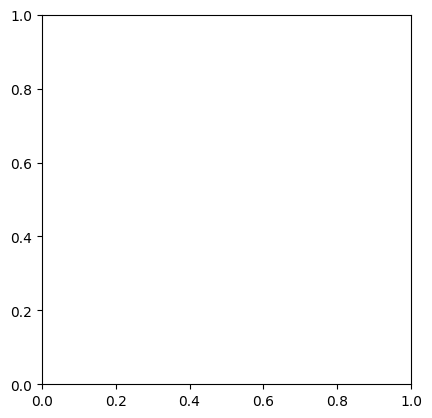

In [23]:
import matplotlib.pyplot as plt
plt.imshow(week_verbs)
plt.axis('off') # 그래프 좌표 없앰
plt.show()